K-means Clustering is an iterative clustering method that segments data into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).

Steps for Plotting K-Means Clusters

1. Preparing Data for Plotting
2. Apply K-Means to the Data
3. Plotting Label 0 K-Means Clusters
4. Plotting Additional K-Means Clusters
5. Plot All K-Means Clusters
6. Plotting the Cluster Centroids

### Importing and Merging Data

In [1]:
#Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

In [2]:
# Importing datasets
data = pd.read_csv(r"C:\Users\DwivedA3\Downloads\Town-wise-education - Karnataka.csv")

In [3]:
data.shape

(812, 46)

### Let's understand the structure of our dataframe

In [4]:
# Let's see the head of our dataset
data.head()

,Table Name,State Code,District Code,Town Code,Total/ Rural/ Urban,Area Name,Age-Group,Total - Persons,Total - Males,Total - Females,...,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
0,C2308,29,1,40117000,Urban,Belgaum (M Corp.),All ages,399653,204598,195055,...,362,7143,5210,1933,41152,26488,14664,3,2,1
1,C2308,29,1,40117000,Urban,Belgaum (M Corp.),0-6,47642,24768,22874,...,0,0,0,0,0,0,0,0,0,0
2,C2308,29,1,40117000,Urban,Belgaum (M Corp.),7,6759,3495,3264,...,0,0,0,0,0,0,0,0,0,0
3,C2308,29,1,40117000,Urban,Belgaum (M Corp.),8,8067,4152,3915,...,0,0,0,0,0,0,0,0,0,0
4,C2308,29,1,40117000,Urban,Belgaum (M Corp.),9,6948,3559,3389,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.describe()

,State Code,District Code,Town Code,Total - Persons,Total - Males,Total - Females,Illiterate - Persons,Illiterate - Males,Illiterate - Females,Literate - Persons,...,Educational Level - Non-technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Technical Diploma or Certificate Not Equal to Degree Persons,Educational Level - Technical Diploma or Certificate Not Equal to Degree Males,Educational Level - Technical Diploma or Certificate Not Equal to Degree Females,Educational Level - Graduate & Above Persons,Educational Level - Graduate & Above Males,Educational Level - Graduate & Above Females,Unclassified - Persons,Unclassified - Males,Unclassified - Females
count,812.0,812.000000,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,8.120000e+02,812.000000,812.000000,8.120000e+02,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,29.0,15.035714,4.150982e+07,2.750764e+04,1.422253e+04,1.328511e+04,7.275195e+03,3113.495074,4161.699507,2.023245e+04,...,26.519704,482.088670,371.315271,110.773399,3043.322660,1905.359606,1137.963054,0.054187,0.032020,0.022167
std,0.0,6.714906,6.718245e+05,1.640983e+05,8.543287e+04,7.867390e+04,4.341504e+04,19577.631904,23934.190637,1.242060e+05,...,239.305779,3034.946141,2344.507666,693.711738,22771.068866,13770.026347,9031.484770,0.429515,0.279085,0.220975
min,29.0,1.000000,4.011700e+07,5.000000e+01,2.300000e+01,2.700000e+01,2.300000e+01,8.000000,15.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.0,11.250000,4.112700e+07,2.916000e+03,1.466750e+03,1.425250e+03,2.950000e+02,121.000000,158.500000,2.213500e+03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.0,16.500000,4.165500e+07,5.657500e+03,2.880500e+03,2.710000e+03,8.970000e+02,319.500000,570.500000,4.070000e+03,...,0.000000,12.000000,9.000000,2.000000,7.500000,4.500000,2.000000,0.000000,0.000000,0.000000
75%,29.0,20.000000,4.200925e+07,1.391750e+04,7.124500e+03,6.696000e+03,2.650000e+03,888.750000,1751.500000,9.455500e+03,...,4.000000,199.750000,153.500000,48.250000,1205.000000,844.000000,252.750000,0.000000,0.000000,0.000000
max,29.0,26.000000,4.260400e+07,4.301326e+06,2.242835e+06,2.058491e+06,1.035624e+06,455158.000000,580466.000000,3.265702e+06,...,6155.000000,77129.000000,59677.000000,17452.000000,593704.000000,360149.000000,233555.000000,9.000000,5.000000,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 46 columns):
Table Name                                                                                   812 non-null object
State Code                                                                                   812 non-null int64
District Code                                                                                812 non-null int64
Town Code                                                                                    812 non-null int64
Total/ Rural/ Urban                                                                          812 non-null object
Area Name                                                                                    812 non-null object
Age-Group                                                                                    812 non-null object
Total - Persons                                                                              812 non-null i

In [7]:
data.drop(['Table Name','State Code','Total/ Rural/ Urban','Age-Group','Area Name','Town Code'], axis='columns', inplace=True)

In [8]:
data.shape

(812, 40)

In [9]:
data.isnull().sum()

District Code                                                                                0
Total - Persons                                                                              0
Total - Males                                                                                0
Total - Females                                                                              0
Illiterate - Persons                                                                         0
Illiterate - Males                                                                           0
Illiterate - Females                                                                         0
Literate - Persons                                                                           0
Literate - Males                                                                             0
Literate - Females                                                                           0
Educational Level - Literate without Educational L

In [10]:
# Checking the percentage of missing values
round(100*(data.isnull().sum()/len(data.index)), 2)

District Code                                                                                0.0
Total - Persons                                                                              0.0
Total - Males                                                                                0.0
Total - Females                                                                              0.0
Illiterate - Persons                                                                         0.0
Illiterate - Males                                                                           0.0
Illiterate - Females                                                                         0.0
Literate - Persons                                                                           0.0
Literate - Males                                                                             0.0
Literate - Females                                                                           0.0
Educational Level - Literate w

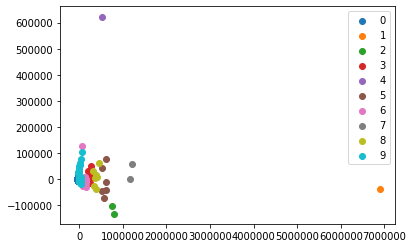

In [11]:
#Load Data
#data = pd.read_csv(r"C:\Users\DwivedA3\Downloads\Town-wise-education - Karnataka.csv")
#data.drop(['Table Name','State Code','Total/ Rural/ Urban','Age-Group','Area Name','Town Code'], axis='columns', inplace=True)
pca = PCA(2)

#Transform the data
df = pca.fit_transform(data)

#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 10)

#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Summary

The following tasks are expected:

1.    Explain the data, define your target and come up with features that can be used for modelling.
2.    Create a model based on your features and come up with the list of target districts
3.    Create a Jupyter notebook with your analysis, which should contain all components such as data fetch, data cleaning, exploratory data analysis, summaries and visualization, feature engineering, mode

Summary :

> There are 812 rows , 46 columns are there in the dataset.
> Applied PCA for dimentionality reduction.
> Checked for missing vlues and outliers.
> Since, there is no label. Hence, this is an unsupervised learning, and thought of applying clustering algorithm (K-means clustering).
> Number of buckets (k = optimum number of clusters) calculted with the elbow curve method.
> The low value cluster contains the target districts that fall behind in areas such as education infrastructure, education awareness, and demographic features

K-means Clustering is an iterative clustering method that segments data into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid).

Steps for Plotting K-Means Clusters

1. Preparing Data for Plotting
2. Apply K-Means to the Data
3. Plotting Label 0 K-Means Clusters
4. Plotting Additional K-Means Clusters
5. Plot All K-Means Clusters
6. Plotting the Cluster Centroids